# Neural Networks Fundamentals

This notebook covers the fundamental concepts of neural networks using PyTorch, including perceptrons, activation functions, multi-layer perceptrons, loss functions, optimizers, and training your first neural network.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import os

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")

# Create output directory if it doesn't exist
output_dir = "02_neural_networks_fundamentals_outputs"
os.makedirs(output_dir, exist_ok=True)

Using device: cuda
PyTorch version: 2.1.2+cu121


## 1. Introduction to Neural Networks

Neural networks are computational models inspired by the structure and function of biological neural networks in the human brain. They consist of interconnected processing units called neurons (or nodes) organized in layers.

**Key Components:**
- **Neurons (Nodes):** Basic computational units that receive inputs, perform calculations, and produce outputs
- **Weights:** Parameters representing the strength or importance of each input
- **Biases:** Additional parameters that allow neurons to be activated even when all inputs are zero
- **Layers:** Neurons are organized into input, hidden, and output layers

In [2]:
print("Neural Networks Fundamentals - Key Concepts:")
print("=" * 50)
print("✓ What is a Neural Network? Biological Inspiration")
print("✓ Basic Components: Neurons, Weights, Biases, Layers")
print("✓ Types of Neural Networks (FNNs, CNNs, RNNs)")
print("✓ Focus: Feedforward Neural Networks (MLPs)")
print("=" * 50)

Neural Networks Fundamentals - Key Concepts:
✓ What is a Neural Network? Biological Inspiration
✓ Basic Components: Neurons, Weights, Biases, Layers
✓ Types of Neural Networks (FNNs, CNNs, RNNs)
✓ Focus: Feedforward Neural Networks (MLPs)


## 2. The Perceptron: The Simplest Neural Network

The perceptron is the most basic neural network, consisting of a single layer of output neurons. It performs a weighted sum of inputs, adds a bias, and applies an activation function.

**Formula:** `output = activation(sum(weights_i * input_i) + bias)`

**Key Limitation:** A single-layer perceptron can only solve linearly separable problems.

In [3]:
# Demonstrate a simple perceptron
print("Perceptron Demonstration:")
print("-" * 30)

# Create a perceptron with 2 inputs and 1 output
perceptron_layer = nn.Linear(2, 1).to(device)
sample_input = torch.tensor([0.5, -1.0], device=device)

# Forward pass through perceptron
weighted_sum = perceptron_layer(sample_input)
output = torch.sigmoid(weighted_sum)  # Using sigmoid as activation

print(f"Sample input: {sample_input.cpu().numpy()}")
print(f"Perceptron weights: {perceptron_layer.weight.data.cpu().numpy()}")
print(f"Perceptron bias: {perceptron_layer.bias.data.cpu().numpy()}")
print(f"Weighted sum + bias: {weighted_sum.item():.4f}")
print(f"Output after sigmoid: {output.item():.4f}")
print("\nNote: Single-layer perceptron can only solve linearly separable problems.")

Perceptron Demonstration:
------------------------------
Sample input: [ 0.5 -1. ]
Perceptron weights: [[0.5406104 0.5869042]]
Perceptron bias: [-0.16565566]
Weighted sum + bias: -0.4823
Output after sigmoid: 0.3817

Note: Single-layer perceptron can only solve linearly separable problems.


## 3. Activation Functions

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns and relationships. Without non-linearity, a multi-layer network would behave like a single-layer linear network.

**Common Activation Functions:**
- **Sigmoid:** `f(x) = 1 / (1 + exp(-x))` - Squashes values between 0 and 1
- **Tanh:** `f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))` - Squashes values between -1 and 1
- **ReLU:** `f(x) = max(0, x)` - Most popular for hidden layers
- **Leaky ReLU:** `f(x) = max(0.01*x, x)` - Addresses "dying ReLU" problem
- **Softmax:** Used in output layer for multi-class classification

In [4]:
# Create input values for plotting activation functions
x_vals = torch.linspace(-6, 6, 100)

# Define activation functions
sigmoid_fn = nn.Sigmoid()
tanh_fn = nn.Tanh()
relu_fn = nn.ReLU()
leaky_relu_fn = nn.LeakyReLU(negative_slope=0.1)

# Compute outputs
y_sigmoid = sigmoid_fn(x_vals)
y_tanh = tanh_fn(x_vals)
y_relu = relu_fn(x_vals)
y_leaky_relu = leaky_relu_fn(x_vals)

print("Activation Functions Computed:")
print(f"Sigmoid range: [{y_sigmoid.min():.3f}, {y_sigmoid.max():.3f}]")
print(f"Tanh range: [{y_tanh.min():.3f}, {y_tanh.max():.3f}]")
print(f"ReLU range: [{y_relu.min():.3f}, {y_relu.max():.3f}]")
print(f"Leaky ReLU range: [{y_leaky_relu.min():.3f}, {y_leaky_relu.max():.3f}]")

Activation Functions Computed:
Sigmoid range: [0.002, 0.998]
Tanh range: [-1.000, 1.000]
ReLU range: [0.000, 6.000]
Leaky ReLU range: [-0.600, 6.000]


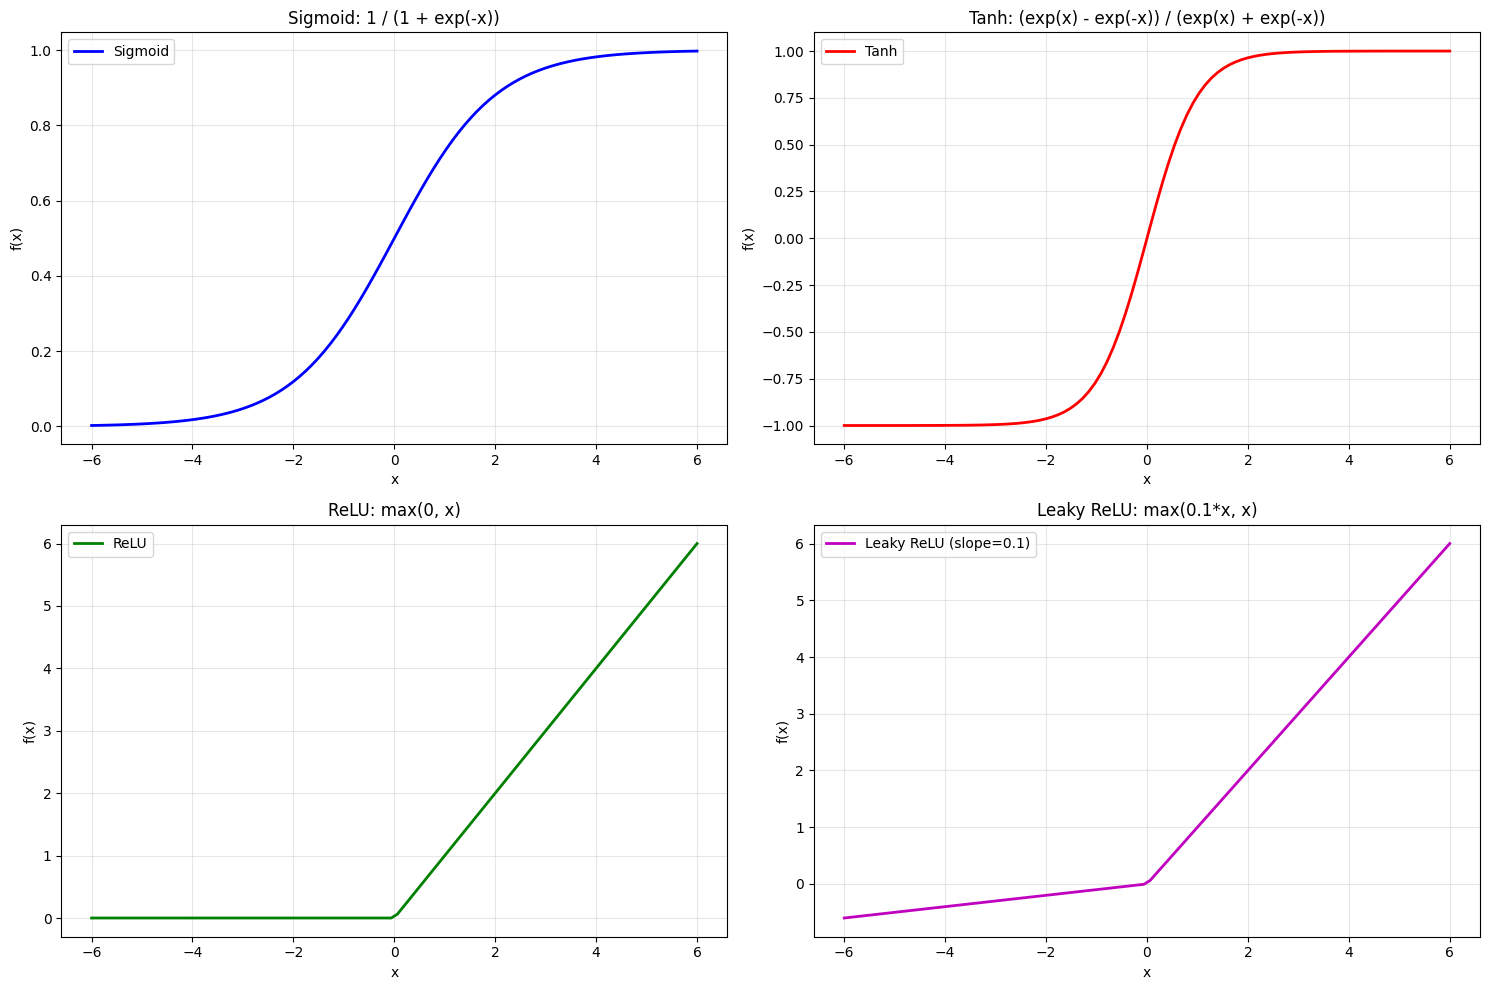

In [5]:
# Plot activation functions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(x_vals.numpy(), y_sigmoid.numpy(), 'b-', linewidth=2, label='Sigmoid')
plt.title('Sigmoid: 1 / (1 + exp(-x))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_vals.numpy(), y_tanh.numpy(), 'r-', linewidth=2, label='Tanh')
plt.title('Tanh: (exp(x) - exp(-x)) / (exp(x) + exp(-x))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_vals.numpy(), y_relu.numpy(), 'g-', linewidth=2, label='ReLU')
plt.title('ReLU: max(0, x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_vals.numpy(), y_leaky_relu.numpy(), 'm-', linewidth=2, label='Leaky ReLU (slope=0.1)')
plt.title('Leaky ReLU: max(0.1*x, x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Demonstrate Softmax activation
softmax_fn = nn.Softmax(dim=1)
sample_logits = torch.tensor([[1.0, -0.5, 2.0], [0.1, 0.5, 0.2]])  # Batch of 2, 3 classes
y_softmax = softmax_fn(sample_logits)

print("Softmax Activation Function:")
print("-" * 30)
print("Sample Logits:")
print(sample_logits)
print("\nSoftmax Output (probabilities that sum to 1):")
print(y_softmax)
print(f"\nSum of probabilities for sample 1: {y_softmax[0].sum():.4f}")
print(f"Sum of probabilities for sample 2: {y_softmax[1].sum():.4f}")

Softmax Activation Function:
------------------------------
Sample Logits:
tensor([[ 1.0000, -0.5000,  2.0000],
        [ 0.1000,  0.5000,  0.2000]])

Softmax Output (probabilities that sum to 1):
tensor([[0.2537, 0.0566, 0.6897],
        [0.2780, 0.4147, 0.3072]])

Sum of probabilities for sample 1: 1.0000
Sum of probabilities for sample 2: 1.0000


## 4. Multi-Layer Perceptrons (MLPs)

Multi-Layer Perceptrons are feedforward neural networks with one or more hidden layers between the input and output layers. Each layer is fully connected to the next.

**Architecture:**
- **Input Layer:** Receives raw input data
- **Hidden Layer(s):** Perform intermediate computations
- **Output Layer:** Produces final predictions

**Universal Approximation Theorem:** An MLP with at least one hidden layer and non-linear activation can approximate any continuous function to arbitrary accuracy (given enough neurons).

In [7]:
# Define a Multi-Layer Perceptron
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)           # Input to hidden layer
        self.relu1 = nn.ReLU()                                  # First activation
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)     # Hidden to smaller hidden
        self.relu2 = nn.ReLU()                                  # Second activation
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)     # Final layer to output

    def forward(self, x):
        print(f"  Input shape: {x.shape}")
        out = self.fc1(x)
        print(f"  After fc1: {out.shape}")
        out = self.relu1(out)
        print(f"  After relu1: {out.shape}")
        out = self.fc2(out)
        print(f"  After fc2: {out.shape}")
        out = self.relu2(out)
        print(f"  After relu2: {out.shape}")
        out = self.fc3(out)
        print(f"  Output shape (logits): {out.shape}")
        return out

# Create and examine the MLP
input_dim = 100
hidden_dim = 64
output_dim = 5

model = SimpleMLP(input_dim, hidden_dim, output_dim).to(device)
print("MLP Architecture:")
print(model)

MLP Architecture:
SimpleMLP(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=5, bias=True)
)


In [8]:
# Count parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params:,}")

# Demonstrate forward propagation
print("\nDemonstrating Forward Propagation:")
print("-" * 40)
batch_size = 4
dummy_input = torch.randn(batch_size, input_dim).to(device)
print(f"Input batch shape: {dummy_input.shape}")

with torch.no_grad():
    predictions = model(dummy_input)

print(f"\nOutput predictions shape: {predictions.shape}")
print("Output for first sample (raw logits):")
print(predictions[0].cpu().numpy())


Total trainable parameters: 8,709

Demonstrating Forward Propagation:
----------------------------------------
Input batch shape: torch.Size([4, 100])
  Input shape: torch.Size([4, 100])
  After fc1: torch.Size([4, 64])
  After relu1: torch.Size([4, 64])
  After fc2: torch.Size([4, 32])
  After relu2: torch.Size([4, 32])
  Output shape (logits): torch.Size([4, 5])

Output predictions shape: torch.Size([4, 5])
Output for first sample (raw logits):
[ 0.11645757  0.02256979 -0.1922178   0.14808097 -0.18391621]


## 5. Defining Neural Networks in PyTorch (nn.Module)

PyTorch provides the `nn.Module` class as the base for all neural network modules:

- **Inheritance:** Custom networks inherit from `nn.Module`
- **Layer Definition:** Layers are defined as attributes in `__init__`
- **Forward Method:** The `forward` method defines how data flows through the network
- **Parameter Management:** PyTorch automatically tracks parameters and gradients

In [9]:
print("PyTorch nn.Module Key Points:")
print("=" * 40)
print("✓ Networks inherit from nn.Module")
print("✓ Layers defined as attributes in __init__")
print("✓ forward() method defines data flow")
print("✓ Automatic parameter tracking")
print("✓ Built-in layers: nn.Linear, nn.Conv2d, etc.")
print("=" * 40)

# Examine the SimpleMLP class structure
print("\nSimpleMLP Class Structure:")
print("- __init__: Defines layers (fc1, relu1, fc2, relu2, fc3)")
print("- forward: Defines computation flow")
print("- Inherits from nn.Module for automatic parameter management")

PyTorch nn.Module Key Points:
✓ Networks inherit from nn.Module
✓ Layers defined as attributes in __init__
✓ forward() method defines data flow
✓ Automatic parameter tracking
✓ Built-in layers: nn.Linear, nn.Conv2d, etc.

SimpleMLP Class Structure:
- __init__: Defines layers (fc1, relu1, fc2, relu2, fc3)
- forward: Defines computation flow
- Inherits from nn.Module for automatic parameter management


## 6. Loss Functions: Measuring Model Error

Loss functions quantify the difference between model predictions and true targets. They guide the learning process by providing a measure of how well the model is performing.

**Common Loss Functions:**
- **MSE Loss (`nn.MSELoss`):** For regression tasks
- **Cross-Entropy Loss (`nn.CrossEntropyLoss`):** For multi-class classification
- **Binary Cross-Entropy (`nn.BCELoss`, `nn.BCEWithLogitsLoss`):** For binary classification

In [11]:
# Demonstrate different loss functions
print("Loss Functions Demonstration:")
print("=" * 40)

# Mean Squared Error (MSE) - For Regression
loss_mse_fn = nn.MSELoss()
predictions_reg = torch.tensor([1.0, 2.5, 3.8], device=device)
targets_reg = torch.tensor([1.2, 2.3, 4.0], device=device)
mse = loss_mse_fn(predictions_reg, targets_reg)

print("1. MSE Loss (Regression):")
print(f"   Predictions: {predictions_reg.cpu().numpy()}")
print(f"   Targets:     {targets_reg.cpu().numpy()}")
print(f"   MSE Loss:    {mse.item():.4f}")

# Cross-Entropy Loss - For Multi-class Classification
loss_ce_fn = nn.CrossEntropyLoss()
predictions_mc = torch.tensor([[2.0, 0.5, -1.0], [0.1, 1.5, 0.2]], device=device)
targets_mc = torch.tensor([0, 1], device=device)
ce = loss_ce_fn(predictions_mc, targets_mc)

print("\n2. Cross-Entropy Loss (Multi-class Classification):")
print("   Predictions (logits):")
print(f"   {predictions_mc.cpu().numpy()}")
print(f"   Targets (class indices): {targets_mc.cpu().numpy()}")
print(f"   Cross-Entropy Loss: {ce.item():.4f}")

# Binary Cross-Entropy with Logits Loss
loss_bce_logits_fn = nn.BCEWithLogitsLoss()
predictions_bc = torch.tensor([-0.5, 1.5, -2.0, 3.0], device=device).unsqueeze(1)
targets_bc = torch.tensor([0.0, 1.0, 0.0, 1.0], device=device).unsqueeze(1)
bce_wl = loss_bce_logits_fn(predictions_bc, targets_bc)

print("\n3. Binary Cross-Entropy with Logits Loss:")
print(f"   Predictions (logits): {predictions_bc.cpu().numpy().flatten()}")
print(f"   Targets (0 or 1):     {targets_bc.cpu().numpy().flatten()}")
print(f"   BCEWithLogits Loss:   {bce_wl.item():.4f}")

Loss Functions Demonstration:
1. MSE Loss (Regression):
   Predictions: [1.  2.5 3.8]
   Targets:     [1.2 2.3 4. ]
   MSE Loss:    0.0400

2. Cross-Entropy Loss (Multi-class Classification):
   Predictions (logits):
   [[ 2.   0.5 -1. ]
 [ 0.1  1.5  0.2]]
   Targets (class indices): [0 1]
   Cross-Entropy Loss: 0.3297

3. Binary Cross-Entropy with Logits Loss:
   Predictions (logits): [-0.5  1.5 -2.   3. ]
   Targets (0 or 1):     [0. 1. 0. 1.]
   BCEWithLogits Loss:   0.2128


## 7. Optimizers: How Neural Networks Learn

Optimizers implement algorithms to update model parameters (weights and biases) based on computed gradients, aiming to minimize the loss function.

**Common Optimizers:**
- **SGD (Stochastic Gradient Descent):** Basic gradient-based optimization
- **SGD with Momentum:** Adds momentum to accelerate learning
- **Adam:** Adaptive learning rate optimization, often a good default choice
- **Learning Rate:** Key hyperparameter controlling step size during updates

In [12]:
# Demonstrate optimizers
print("Optimizers Demonstration:")
print("=" * 30)

# Create a dummy model for demonstration
dummy_model = nn.Linear(10, 2).to(device)
print(f"Initial parameter value: {dummy_model.weight[0,0].item():.4f}")

# Create optimizers
optimizer_sgd = optim.SGD(dummy_model.parameters(), lr=0.01, momentum=0.9)
print("\nOptimizers created:")
print("✓ SGD with lr=0.01, momentum=0.9")

optimizer_adam = optim.Adam(dummy_model.parameters(), lr=0.001)
print("✓ Adam with lr=0.001")

# Simulate one optimization step with SGD
dummy_input = torch.randn(5, 10).to(device)
dummy_target = torch.randn(5, 2).to(device)
criterion = nn.MSELoss()

print("\nSimulating one SGD optimization step:")
optimizer_sgd.zero_grad()                    # Clear gradients
outputs = dummy_model(dummy_input)           # Forward pass
loss = criterion(outputs, dummy_target)      # Calculate loss
loss.backward()                              # Backward pass (compute gradients)
optimizer_sgd.step()                         # Update weights

print(f"Parameter after SGD step: {dummy_model.weight[0,0].item():.4f}")
print(f"Loss: {loss.item():.4f}")

Optimizers Demonstration:
Initial parameter value: 0.1486


/root/miniconda3/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Optimizers created:
✓ SGD with lr=0.01, momentum=0.9
✓ Adam with lr=0.001

Simulating one SGD optimization step:
Parameter after SGD step: 0.1482
Loss: 0.8230


## 8. The Training Loop: Forward and Backward Propagation

The training loop is the core process of neural network training:

**Steps:**
1. **Forward Propagation:** Pass data through network, calculate predictions and loss
2. **Zero Gradients:** Clear old gradients with `optimizer.zero_grad()`
3. **Backward Propagation:** Compute gradients with `loss.backward()`
4. **Optimizer Step:** Update parameters with `optimizer.step()`
5. **Repeat:** Iterate over epochs and batches

In [ ]:
print("Training Loop Steps:")
print("=" * 30)
print("1. Forward Propagation:")
print("   → outputs = model(inputs)")
print("   → loss = criterion(outputs, labels)")
print()
print("2. Clear Gradients:")
print("   → optimizer.zero_grad()")
print()
print("3. Backward Propagation:")
print("   → loss.backward()")
print()
print("4. Update Parameters:")
print("   → optimizer.step()")
print()
print("5. Repeat for all batches and epochs")
print("=" * 30)

## 9. Building and Training Your First Neural Network

Let's solve the XOR problem - a classic example that demonstrates why we need multi-layer networks. XOR is not linearly separable, so a single perceptron cannot solve it, but an MLP can.

**XOR Truth Table:**
- (0,0) → 0
- (0,1) → 1  
- (1,0) → 1
- (1,1) → 0

In [14]:
# Step 1: Prepare the XOR data
print("Step 1: Preparing XOR Data")
print("-" * 30)

# XOR inputs and outputs
X_xor = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]], device=device)
y_xor = torch.tensor([[0.], [1.], [1.], [0.]], device=device)

print("XOR Truth Table:")
print("Input  | Output")
print("-------|-------")
for i in range(len(X_xor)):
    print(f"{X_xor[i].cpu().numpy()} | {y_xor[i].item():.0f}")

# Create dataset and dataloader
xor_dataset = TensorDataset(X_xor, y_xor)
xor_dataloader = DataLoader(xor_dataset, batch_size=4, shuffle=True)

print(f"\nDataset created with {len(xor_dataset)} samples")
print(f"Batch size: {xor_dataloader.batch_size}")

Step 1: Preparing XOR Data
------------------------------
XOR Truth Table:
Input  | Output
-------|-------
[0. 0.] | 0
[0. 1.] | 1
[1. 0.] | 1
[1. 1.] | 0

Dataset created with 4 samples
Batch size: 4


In [15]:
# Step 2: Define the XOR Neural Network
print("Step 2: Defining XOR Neural Network")
print("-" * 35)

class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)      # 2 inputs, 8 hidden neurons
        self.relu = nn.ReLU()           # ReLU activation
        self.fc2 = nn.Linear(8, 1)      # 8 hidden, 1 output

    def forward(self, x):
        x = self.fc1(x)                 # Linear transformation
        x = self.relu(x)                # Non-linear activation
        x = self.fc2(x)                 # Output layer (logits)
        return x

# Create the model
xor_model = XORNet().to(device)
print("XORNet Architecture:")
print(xor_model)

# Count parameters
xor_params = sum(p.numel() for p in xor_model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {xor_params}")

Step 2: Defining XOR Neural Network
-----------------------------------
XORNet Architecture:
XORNet(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)

Total trainable parameters: 33


In [16]:
# Step 3: Define Loss Function and Optimizer
print("Step 3: Loss Function and Optimizer")
print("-" * 35)

criterion = nn.BCEWithLogitsLoss()  # Handles sigmoid internally
optimizer = optim.Adam(xor_model.parameters(), lr=0.05)

print(f"Loss Function: {criterion}")
print(f"Optimizer: Adam with lr=0.05")
print(f"Optimizer parameters: {len(list(optimizer.param_groups[0]['params']))} parameter groups")

Step 3: Loss Function and Optimizer
-----------------------------------
Loss Function: BCEWithLogitsLoss()
Optimizer: Adam with lr=0.05
Optimizer parameters: 4 parameter groups


In [17]:
# Step 4: Training Loop
print("Step 4: Training the XOR Network")
print("-" * 35)

num_epochs = 1000
losses_history = []

print(f"Training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    for inputs, labels in xor_dataloader:
        # Forward pass
        outputs = xor_model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses_history.append(loss.item())
    
    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print(f"Training completed! Final loss: {loss.item():.4f}")

Step 4: Training the XOR Network
-----------------------------------
Training for 1000 epochs...
Epoch [200/1000], Loss: 0.0051
Epoch [400/1000], Loss: 0.0017
Epoch [600/1000], Loss: 0.0009
Epoch [800/1000], Loss: 0.0006
Epoch [1000/1000], Loss: 0.0004
Training completed! Final loss: 0.0004


In [ ]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses_history, 'b-', linewidth=2)
plt.title('XOR Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('BCEWithLogitsLoss')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better see the convergence
plt.show()

print(f"Loss decreased from {losses_history[0]:.4f} to {losses_history[-1]:.4f}")

In [20]:
# Step 5: Evaluate the Model
print("Step 5: Model Evaluation")
print("-" * 25)

xor_model.eval()  # Set to evaluation mode
with torch.no_grad():
    test_predictions_logits = xor_model(X_xor)
    test_predictions_probs = torch.sigmoid(test_predictions_logits)
    predicted_classes = (test_predictions_probs >= 0.5).float()
    
    accuracy = (predicted_classes == y_xor).float().mean()
    
    print(f"Final Accuracy: {accuracy.item()*100:.2f}%")
    print("\nDetailed Results:")
    print("Input  | True | Pred Prob | Pred Class | Correct")
    print("-------|------|-----------|------------|--------")
    
    for i in range(len(X_xor)):
        input_vals = X_xor[i].cpu().numpy()
        true_val = y_xor[i].item()
        pred_prob = test_predictions_probs[i].item()
        pred_class = predicted_classes[i].item()
        correct = "✓" if pred_class == true_val else "✗"
        
        print(f"{input_vals} | {true_val:.0f}    | {pred_prob:.4f}    | {pred_class:.0f}          | {correct}")

xor_model.train()  # Set back to training mode

Step 5: Model Evaluation
-------------------------
Final Accuracy: 100.00%

Detailed Results:
Input  | True | Pred Prob | Pred Class | Correct
-------|------|-----------|------------|--------
[0. 0.] | 0    | 0.0001    | 0          | ✓
[0. 1.] | 1    | 0.9987    | 1          | ✓
[1. 0.] | 1    | 0.9999    | 1          | ✓
[1. 1.] | 0    | 0.0001    | 0          | ✓


XORNet(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)

## Conclusion

Congratulations! You've successfully built and trained your first neural network using PyTorch. Here's what we covered:

**Key Takeaways:**
1. **Neural Networks** are computational models inspired by biological neurons
2. **Perceptrons** are the simplest neural networks but limited to linearly separable problems
3. **Activation Functions** introduce non-linearity, enabling complex pattern learning
4. **Multi-Layer Perceptrons** can solve non-linearly separable problems like XOR
5. **Loss Functions** measure prediction error and guide learning
6. **Optimizers** update model parameters to minimize loss
7. **Training Loop** combines forward propagation, gradient computation, and parameter updates

**What's Next:**
- Explore automatic differentiation in detail
- Learn advanced training techniques
- Work with real datasets and data preprocessing
- Dive into specialized architectures (CNNs, RNNs, Transformers)